In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting Started with LangChain 🦜️🔗 + Vertex AI PaLM API

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/language/examples/langchain-intro/getting_started_with_langchain.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/examples/langchain-intro/getting_started_with_langchain.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/blob/main/language/examples/langchain-intro/getting_started_with_langchain.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      Open in Vertex AI Workbench
    </a>
  </td>
</table>

### **What is LangChain?**
> LangChain is a framework for developing applications powered by large language models (LLMs).

**TL;DR** LangChain makes the complicated parts of working & building with language models easier. It helps do this in two ways:

1. **Integration** - Bring external data, such as your files, other applications, and API data, to LLMs
2. **Agents** - Allows LLMs to interact with its environment via decision making and use LLMs to help decide which action to take next

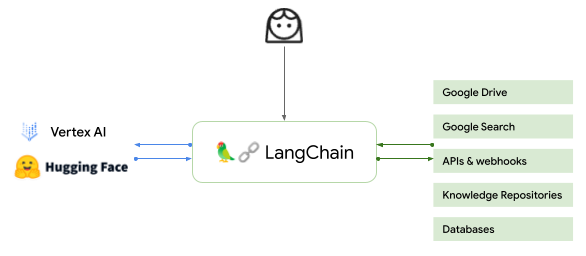

To build effective Generative AI applications, it is key to enable LLMs to interact with external systems. This makes models data-aware and agentic, meaning they can understand, reason, and use data to take action in a meaningful way. The external systems could be public data corpus,  private knowledge repositories, databases, applications, APIs, or access to the public internet via Google Search.


Here are a few patterns where LLMs can be augmented with other systems:
- Convert natural language to SQL, executing the SQL on database, analyze and present the results
- Calling an external webhook or API based on the user query
- Synthesize outputs from multiple models, or chain the models in a specific order


It may look trivial to plumb these calls together and orchestrate them but it becomes a mundane task to write glue code again and again e.g. for every different data connector or a new model. That’s where LangChain comes in!

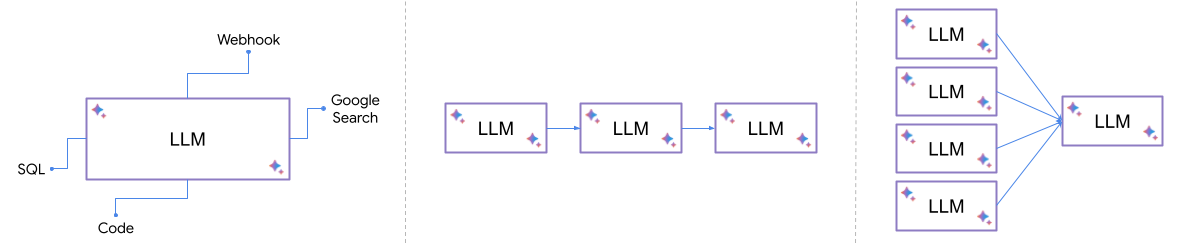

### **Why LangChain?**

LangChain’s modular implementation of components and common patterns combining these components makes it easier to build complex applications based on LLMs. LangChain enables these models to connect to data sources and systems as agents to take action.


1. **Components** are abstractions that works to bring external data, such as your documents, databases, applications,APIs to language models. LangChain makes it easy to swap out abstractions and components necessary to work with LLMs.

2. **Agents** enable language models to communicate with its environment, where the model then decides the next action to take. LangChain provides out of the box support for using and customizing 'chains' - a series of actions strung together.

Though LLMs can be straightforward (text-in, text-out) you'll quickly run into friction points that LangChain helps with once you develop more complicated applications.

### LangChain & Vertex AI

[Vertex AI PaLM foundational models](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview) — Text, Chat, and Embeddings — are officially integrated with the [LangChain Python SDK](https://python.langchain.com/en/latest/index.html), making it convenient to build applications on top of Vertex AI PaLM models. You can now create Generative AI applications by combining the power of Vertex PaLM models with the ease of use and flexibility of LangChain.

- [LangChain with Vertex AI PaLM for LLMs](https://python.langchain.com/en/latest/modules/models/llms/integrations/google_vertex_ai_palm.html)
- [LangChain with Vertex AI PaLM for Chat](https://python.langchain.com/en/latest/modules/models/chat/integrations/google_vertex_ai_palm.html)
- [LangChain with Vertex AI Embedding API for Text](https://python.langchain.com/en/latest/modules/models/text_embedding/examples/google_vertex_ai_palm.html)

---
*Note: This notebook does not cover all aspects of LangChain. Its contents have been curated to get you to building & impact as quick as possible. For more, please check out [LangChain Conceptual Documentation](https://docs.langchain.com/docs/)*

## Objectives
This notebook provides an introductory understanding of [Langchain](https://langchain.com/) components and use cases of LangChain with Vertex PaLM APIs.

- Introduce LangChain components
- Showcase LangChain + Vertex PaLM API - Text, Chat and Embedding
- Summarizing a large text
- Question/Answering from PDF (retrieval based)
- Chain LLMs with Google Search

---

**References:**

- Adapted from [LangChain Cookbook](https://github.com/gkamradt/langchain-tutorials) from [Greg Kamradt](https://twitter.com/GregKamradt)
- [LangChain Conceptual Documentation](https://docs.langchain.com/docs/)
- [LangChain Python Documentation](https://python.langchain.com/en/latest/)

### Costs
This tutorial uses billable components of Google Cloud:

* Vertex AI

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing),
and use the [Pricing Calculator](https://cloud.google.com/products/calculator/)
to generate a cost estimate based on your projected usage.

In [ ]:
# Install Vertex AI LLM SDK
! pip install google-cloud-aiplatform langchain pandas datasets google-api-python-client chromadb pypdf faiss-cpu faiss-cpu transformers config --upgrade --user

**Colab only:** Uncomment the following cell to restart the kernel or use the button to restart the kernel. For Vertex AI Workbench you can restart the terminal using the button on top.

In [ ]:
# # Automatically restart kernel after installs so that your environment can access the new packages
# import IPython

# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)

### Authenticating your notebook environment
* If you are using **Colab** to run this notebook, uncomment the cell below and continue.
* If you are using **Vertex AI Workbench**, check out the setup instructions [here](https://github.com/GoogleCloudPlatform/generative-ai/tree/main/setup-env).

In [ ]:
# from google.colab import auth as google_auth
# google_auth.authenticate_user()

### Import libraries

**Colab only:** Uncomment the following cell to initialize the Vertex AI SDK. For Vertex AI Workbench, you don't need to run this.

In [ ]:
# import vertexai

# PROJECT_ID = "[your-project-id]"  # @param {type:"string"}
# vertexai.init(project=PROJECT_ID, location="us-central1")

In [ ]:
# Utils
import time
from typing import List

# Langchain
import langchain
from pydantic import BaseModel

print(f"LangChain version: {langchain.__version__}")

# Vertex AI
from google.cloud import aiplatform
from langchain.chat_models import ChatVertexAI
from langchain.embeddings import VertexAIEmbeddings
from langchain.llms import VertexAI
from langchain.schema import HumanMessage, SystemMessage

print(f"Vertex AI SDK version: {aiplatform.__version__}")

Next you will define some utility functions that you will use for the Vertex AI Embeddings API

In [ ]:
# Utility functions for Embeddings API with rate limiting
def rate_limit(max_per_minute):
    period = 60 / max_per_minute
    print("Waiting")
    while True:
        before = time.time()
        yield
        after = time.time()
        elapsed = after - before
        sleep_time = max(0, period - elapsed)
        if sleep_time > 0:
            print(".", end="")
            time.sleep(sleep_time)


class CustomVertexAIEmbeddings(VertexAIEmbeddings, BaseModel):
    requests_per_minute: int
    num_instances_per_batch: int

    # Overriding embed_documents method
    def embed_documents(self, texts: List[str]):
        limiter = rate_limit(self.requests_per_minute)
        results = []
        docs = list(texts)

        while docs:
            # Working in batches because the API accepts maximum 5
            # documents per request to get embeddings
            head, docs = (
                docs[: self.num_instances_per_batch],
                docs[self.num_instances_per_batch :],
            )
            chunk = self.client.get_embeddings(head)
            results.extend(chunk)
            next(limiter)

        return [r.values for r in results]

Define LangChain Models using Vertex AI PaLM API for Text, Chat and Vertex AI Embedding for Text

In [ ]:
# LLM model
llm = VertexAI(
    model_name="text-bison@001",
    max_output_tokens=256,
    temperature=0.1,
    top_p=0.8,
    top_k=40,
    verbose=True,
)

# Chat
chat = ChatVertexAI()

# Embedding
EMBEDDING_QPM = 100
EMBEDDING_NUM_BATCH = 5
embeddings = CustomVertexAIEmbeddings(
    requests_per_minute=EMBEDDING_QPM,
    num_instances_per_batch=EMBEDDING_NUM_BATCH,
)

# LangChain Components

Let’s take a quick tour of LangChain framework and concepts to be aware of. LangChain offers a variety of modules that can be used to create language model applications. These modules can be combined to create more complex applications, or can be used individually for simpler applications.

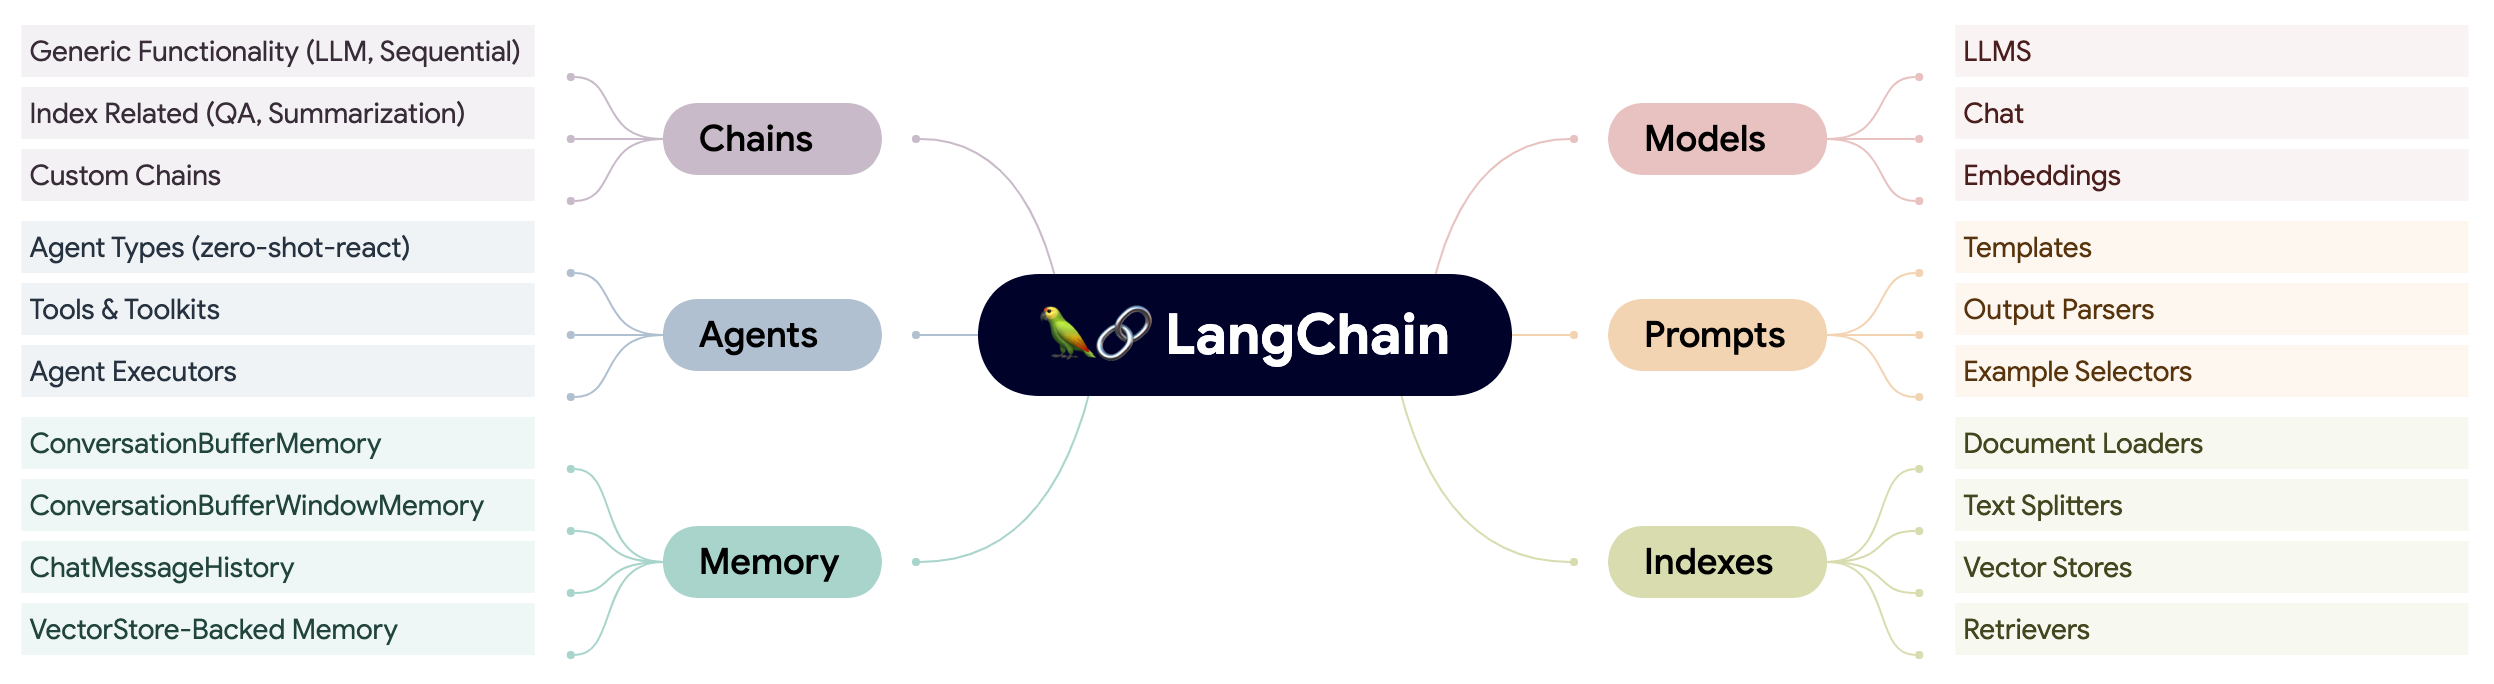

- **Models** are the building block of LangChain providing an interface to different types of AI models. Large Language Models (LLMs), Chat and Text Embeddings models are supported model types.
- **Prompts** refers to the input to the model, which is typically constructed from multiple components. LangChain provides interfaces to construct and work with prompts easily - Prompt Templates, Example Selectors and Output Parsers.
- **Memory** provides a construct for storing and retrieving messages during a conversation which can be either short term or long term.
- **Indexes** help LLMs interact with documents by providing a way to structure them. LangChain provides Document Loaders to load documents, Text Splitters to split documents into smaller chunks, Vector Stores to store documents as embeddings, and Retrievers to fetch relevant documents.
- **Chains** let you combine modular components (or other chains) in a specific order to complete a task.
- **Agents** are a powerful construct in LangChain allowing LLMs to communicate with external systems via Tools and observe and decide on the best course of action to complete a given task.


## Schema - Nuts and Bolts of working with LLMs

### **Text**
Text is the natural language way to interact with LLMs.

In [ ]:
# You'll be working with simple strings (that'll soon grow in complexity!)
my_text = "What day comes after Friday?"

llm(my_text)

### **Chat Messages**
Chat is like text, but specified with a message type (System, Human, AI)

* **System** - Helpful context that tells the AI what to do
* **Human** - Messages intended to represent the user
* **AI** - Messages showing what the AI responded with

For more information, see [LangChain Documentation for Chat Models](https://python.langchain.com/en/latest/modules/models/chat/getting_started.html).

In [ ]:
chat([HumanMessage(content="Hello")])

In [ ]:
res = chat(
    [
        SystemMessage(
            content="You are a nice AI bot that helps a user figure out what to eat in one short sentence"
        ),
        HumanMessage(content="I like tomatoes, what should I eat?"),
    ]
)

print(res.content)

You can also pass more chat history w/ responses from the AI

In [ ]:
res = chat(
    [
        HumanMessage(
            content="What are the ingredients required for making a tomato sandwich?"
        )
    ]
)
print(res.content)

In [ ]:
res = chat([HumanMessage(content="How many slices of bread you said?")])
print(res.content)

### **Documents**

Document in LangChain refers to an unstructured text consisting of `page_content` referring to the content of the data and `metadata` (data describing attributes of page content).

In [ ]:
from langchain.schema import Document

In [ ]:
Document(
    page_content="This is my document. It is full of text that I've gathered from other places",
    metadata={
        "my_document_id": 234234,
        "my_document_source": "The LangChain Papers",
        "my_document_create_time": 1680013019,
    },
)

## Models - The interface to the AI brains

LangChain supports [3 model primitives](https://docs.langchain.com/docs/components/models/):
- LLMs
- Chat Models
- Text Embedding Models

###  **Language Model**
Language model does text in ➡️ text out!

[LangChain LLMs](https://python.langchain.com/en/latest/modules/models/llms/integrations/google_vertex_ai_palm.html) are integrated with [Vertex AI PaLM API for Text](https://cloud.google.com/vertex-ai/docs/generative-ai/text/text-overview).

In [ ]:
llm("What day comes after Friday?")

### **Chat Model**
Chat model that takes a series of messages and returns a message output.

[LangChain Chat Model](https://python.langchain.com/en/latest/modules/models/chat/integrations/google_vertex_ai_palm.html) is integrated with [Vertex AI PaLM API for Chat](https://cloud.google.com/vertex-ai/docs/generative-ai/chat/chat-prompts).

In [ ]:
res = chat(
    [
        SystemMessage(content="You are a helpful AI bot to figure out travel plans."),
        HumanMessage(content="I would like to go to New York, how should I do this?"),
    ]
)
print(res.content)

### **Text Embedding Model**

[Embeddings](https://cloud.google.com/blog/topics/developers-practitioners/meet-ais-multitool-vector-embeddings) are a way of representing data–almost any kind of data, like text, images, videos, users, music, whatever–as points in space where the locations of those points in space are semantically meaningful. Embeddings transform your text into a vector (a series of numbers that hold the semantic 'meaning' of your text). Vectors are often used when comparing two pieces of text together. An [embedding](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture) is a relatively low-dimensional space into which you can translate high-dimensional vectors.

[LangChain Text Embedding Model](https://python.langchain.com/en/latest/modules/models/text_embedding/examples/google_vertex_ai_palm.html) is integrated with [Vertex AI Embedding API for Text](https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-text-embeddings).


*BTW: Semantic means 'relating to meaning in language or logic.'*

In [ ]:
text = "Hi! It's time for the beach"

In [ ]:
text_embedding = embeddings.embed_query(text)
print(f"Your embedding is length {len(text_embedding)}")
print(f"Here's a sample: {text_embedding[:5]}...")

## Prompts
Prompts are text used as instructions to your model. For more details have a look at the notebook [intro-into-prompt-design](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/intro_prompt_design.ipynb).

In [ ]:
prompt = """
Today is Monday, tomorrow is Wednesday.

What is wrong with that statement?
"""

llm(prompt)

### **Prompt Template**

[Prompt Template](https://python.langchain.com/en/latest/modules/prompts/prompt_templates.html) is an object that helps to create prompts based on a combination of user input, other non-static information and a fixed template string.

Think of it as an [f-string](https://realpython.com/python-f-strings/) in python but for prompts

In [ ]:
from langchain import PromptTemplate

# Notice "location" below, that is a placeholder for another value later
template = """
I really want to travel to {location}. What should I do there?

Respond in one short sentence
"""

prompt = PromptTemplate(
    input_variables=["location"],
    template=template,
)

final_prompt = prompt.format(location="Rome")

print(f"Final Prompt: {final_prompt}")
print("-----------")
print(f"LLM Output: {llm(final_prompt)}")

### **Example Selectors**

[Example selectors](https://python.langchain.com/en/latest/modules/prompts/example_selectors.html) are an easy way to select from a series of examples to dynamically place in-context information into your prompt. Often used when the task is nuanced or has a large list of examples.

Check out different types of example selectors [here](https://python.langchain.com/en/latest/modules/prompts/example_selectors.html)

In [ ]:
from langchain.prompts import FewShotPromptTemplate, PromptTemplate
from langchain.prompts.example_selector import \
    SemanticSimilarityExampleSelector
from langchain.vectorstores import FAISS

example_prompt = PromptTemplate(
    input_variables=["input", "output"],
    template="Example Input: {input}\nExample Output: {output}",
)

# Examples of locations that nouns are found
examples = [
    {"input": "pirate", "output": "ship"},
    {"input": "pilot", "output": "plane"},
    {"input": "driver", "output": "car"},
    {"input": "tree", "output": "ground"},
    {"input": "bird", "output": "nest"},
]

In [ ]:
# SemanticSimilarityExampleSelector will select examples that are similar to your input by semantic meaning

example_selector = SemanticSimilarityExampleSelector.from_examples(
    # This is the list of examples available to select from.
    examples,
    # This is the embedding class used to produce embeddings which are used to measure semantic similarity.
    embeddings,
    # This is the VectorStore class that is used to store the embeddings and do a similarity search over.
    FAISS,
    # This is the number of examples to produce.
    k=2,
)

In [ ]:
similar_prompt = FewShotPromptTemplate(
    # The object that will help select examples
    example_selector=example_selector,
    # Your prompt
    example_prompt=example_prompt,
    # Customizations that will be added to the top and bottom of your prompt
    prefix="Give the location an item is usually found in",
    suffix="Input: {noun}\nOutput:",
    # What inputs your prompt will receive
    input_variables=["noun"],
)

In [ ]:
# Select a noun!
my_noun = "student"

print(similar_prompt.format(noun=my_noun))

In [ ]:
llm(similar_prompt.format(noun=my_noun))

### **Output Parsers**

[Output Parsers](https://python.langchain.com/en/latest/modules/prompts/output_parsers.html) help to format the output of a model. Usually used for structured output.

Two main ideas:

**1. Format Instructions**: An autogenerated prompt that tells the LLM how to format it's response based off desired result

**2. Parser**: A method to extract model's text output into a desired structure (usually json)

In [ ]:
from langchain.output_parsers import ResponseSchema, StructuredOutputParser

In [ ]:
# How you would like your reponse structured. This is basically a fancy prompt template
response_schemas = [
    ResponseSchema(
        name="bad_string", description="This a poorly formatted user input string"
    ),
    ResponseSchema(
        name="good_string", description="This is your response, a reformatted response"
    ),
]

# How you would like to parse your output
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [ ]:
# See the prompt template you created for formatting
format_instructions = output_parser.get_format_instructions()
print(format_instructions)

In [ ]:
template = """
You will be given a poorly formatted string from a user.
Reformat it and make sure all the words are spelled correctly including country, city and state names

{format_instructions}

% USER INPUT:
{user_input}

YOUR RESPONSE:
"""

prompt = PromptTemplate(
    input_variables=["user_input"],
    partial_variables={"format_instructions": format_instructions},
    template=template,
)

promptValue = prompt.format(user_input="welcom to dbln!")

print(promptValue)

In [ ]:
llm_output = llm(promptValue)
llm_output

In [ ]:
output_parser.parse(llm_output)

## Indexes

[Indexes](https://docs.langchain.com/docs/components/indexing/) refer to ways to structure documents for LLMs to work with them.

### **Document Loaders**
Dcoument loaders are ways to import data from other sources. See the [growing list](https://python.langchain.com/en/latest/modules/indexes/document_loaders.html) of document loaders here. There are more on [Llama Index](https://llamahub.ai/) as well that work with LangChain Document Loaders.

In [ ]:
from langchain.document_loaders import WebBaseLoader

In [ ]:
loader = WebBaseLoader("http://www.paulgraham.com/worked.html")

In [ ]:
data = loader.load()

In [ ]:
print(f"Found {len(data)} comments")
print(f"Here's a sample:\n\n{''.join([x.page_content[:150] for x in data[:2]])}")

### **Text Splitters**

[Text Splitters](https://python.langchain.com/en/latest/modules/indexes/text_splitters.html) are a way to deal with input token limits of LLMs by splitting text into chunks.

There are many ways you could split your text into chunks, experiment with [different ones](https://python.langchain.com/en/latest/modules/indexes/text_splitters.html) to see which is best for your use case.

In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("http://www.paulgraham.com/worked.html")
pg_work = loader.load()

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=1000,
    chunk_overlap=20,
)

texts = text_splitter.split_documents(pg_work)

In [ ]:
print(f"You have {len(texts)} documents")

In [ ]:
print("Preview:")
print(texts[0].page_content, "\n")
print(texts[1].page_content)

### **Retrievers**

[Retrievers](https://python.langchain.com/en/latest/modules/indexes/retrievers.html) are a way of storing data such that it can be queried by a language model. Easy way to combine documents with language models.

There are [many different types of retrievers](https://python.langchain.com/en/latest/modules/indexes/retrievers.html), the most widely supported is the VectoreStoreRetriever.

In [ ]:
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS

In [ ]:
loader = WebBaseLoader("http://www.paulgraham.com/worked.html")
documents = loader.load()

Here we use [Facebook AI Similarity Search (FAISS)](https://engineering.fb.com/2017/03/29/data-infrastructure/faiss-a-library-for-efficient-similarity-search/), a library and a  vector database for similarity search and clustering of dense vectors. To generate dense vectors, a.k.a. embeddings, we use [LangChain text embeddings model with Vertex AI Embeddings for Text](https://python.langchain.com/en/latest/modules/models/text_embedding/examples/google_vertex_ai_palm.html) .

In [ ]:
# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# Embed your texts
db = FAISS.from_documents(texts, embeddings)

In [ ]:
# Init your retriever. Asking for just 1 document back
retriever = db.as_retriever()
retriever

In [ ]:
docs = retriever.get_relevant_documents(
    "what types of things did the author want to develop or build?"
)

print("\n\n".join([x.page_content[:200] for x in docs[:2]]))

### **VectorStores**

[Vector Store](https://python.langchain.com/en/latest/modules/indexes/vectorstores.html) is a common type of index or a database to store vectors (numerical embeddings). Conceptually, think of them as tables with a column for embeddings (vectors) and a column for metadata.

Example

| Embedding      | Metadata |
| ----------- | ----------- |
| [-0.00015641732898075134, -0.003165106289088726, ...]      | {'date' : '1/2/23}       |
| [-0.00035465431654651654, 1.4654131651654516546, ...]   | {'date' : '1/3/23}        |



- [Chroma](https://www.trychroma.com/) & [FAISS](https://engineering.fb.com/2017/03/29/data-infrastructure/faiss-a-library-for-efficient-similarity-search/) are easy to work with locally.
- [Vertex AI Matching Engine](https://cloud.google.com/blog/products/ai-machine-learning/vertex-matching-engine-blazing-fast-and-massively-scalable-nearest-neighbor-search) is fully managed vector store on Google Cloud, developers can just add the embeddings to its index and issue a search query with a key embedding for the blazingly fast vector search.

<br/>

**[LangChain VectorStore is integrated with Vertex AI Matching Engine](https://python.langchain.com/en/latest/modules/indexes/vectorstores/examples/matchingengine.html).**


In [ ]:
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS

loader = WebBaseLoader("http://www.paulgraham.com/worked.html")
documents = loader.load()

# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

In [ ]:
print(f"You have {len(texts)} documents")

In [ ]:
embedding_list = embeddings.embed_documents([text.page_content for text in texts])

In [ ]:
print(f"You have {len(embedding_list)} embeddings")
print(f"Here's a sample of one: {embedding_list[0][:3]}...")

Vectorstore stores your embeddings (☝️) and make them easily searchable.

## Memory

[Memory](https://python.langchain.com/en/latest/modules/memory/getting_started.html) is the concept of storing and retrieving data in the process of a conversation. Memory helps LLMs remember information you've chatted about in the past or more complicated information retrieval.

There are many types of memory, explore [the documentation](https://python.langchain.com/en/latest/modules/memory/how_to_guides.html) to see which one fits your use case.

### ConversationBufferMemory

 Memory keeps conversation state throughout a user’s interactions with an language model. `ConversationBufferMemory` memory allows for storing of messages and then extracts the messages in a variable.

 We'll use `ConversationChain` to have a conversation and load context from memory. We will look into Chains in the next section.

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

conversation = ConversationChain(
    llm=llm, verbose=True, memory=ConversationBufferMemory()
)

conversation.predict(input="Hi there!")

In [ ]:
conversation.predict(input="What is the capital of France?")

In [ ]:
conversation.predict(input="What are some popular places I can see in France?")

In [ ]:
conversation.predict(input="What question did I ask first?")

## Chains ⛓️⛓️⛓️

Chains are a generic concept in LangChain allowing to combine different LLM calls and action automatically.

Ex:
```
Summary #1, Summary #2, Summary #3 --> Final Summary
```

There are [many applications of chains](https://python.langchain.com/en/latest/modules/chains/how_to_guides.html) search to see which are best for your use case.

We'll cover a few of them:

### 1. Simple Sequential Chains

 [Sequential chains](https://python.langchain.com/en/latest/modules/chains/generic/sequential_chains.html) are a series of chains, called in deterministic order. `SimpleSequentialChain` are easy chains where each step uses the output of an LLM as an input into another. Good for breaking up tasks (and keeping the LLM focused).

In [ ]:
from langchain.chains import LLMChain, SimpleSequentialChain
from langchain.prompts import PromptTemplate

In [ ]:
template = """Your job is to come up with a classic dish from the area that the users suggests.
% USER LOCATION
{user_location}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_location"], template=template)

# Holds my 'location' chain
location_chain = LLMChain(llm=llm, prompt=prompt_template)

In [ ]:
template = """Given a meal, give a short and simple recipe on how to make that dish at home.
% MEAL
{user_meal}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_meal"], template=template)

# Holds my 'meal' chain
meal_chain = LLMChain(llm=llm, prompt=prompt_template)

In [ ]:
overall_chain = SimpleSequentialChain(chains=[location_chain, meal_chain], verbose=True)

In [ ]:
review = overall_chain.run("Rome")

### 2. Summarization Chain

[Summarization Chain](https://python.langchain.com/en/latest/modules/chains/index_examples/summarize.html) easily runs through a long numerous documents and get a summary.

There are multiple chain types such as Stuffing, Map-Reduce, Refine, Map-Rerank. Check out [documentation](https://python.langchain.com/en/latest/modules/chains/how_to_guides.html) for other chain types besides `map-reduce`.

In [ ]:
from langchain.chains.summarize import load_summarize_chain
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = WebBaseLoader(
    "https://cloud.google.com/blog/products/ai-machine-learning/how-to-use-grounding-for-your-llms-with-text-embeddings"
)
documents = loader.load()

print(f"# of words in the document = {len(documents[0].page_content)}")

# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# There is a lot of complexity hidden in this one line. I encourage you to check out the video above for more detail
chain = load_summarize_chain(llm, chain_type="map_reduce", verbose=True)
chain.run(texts)

### 3. Question/Answering Chain

[Question Answering Chains] easily do QA over a set of documents using QA chain. There are multiple ways to do this with LangChain. We use [**RetrievalQA** chain](https://python.langchain.com/en/latest/modules/chains/index_examples/vector_db_qa_with_sources.html) which uses **load_qa_chain** under the hood.

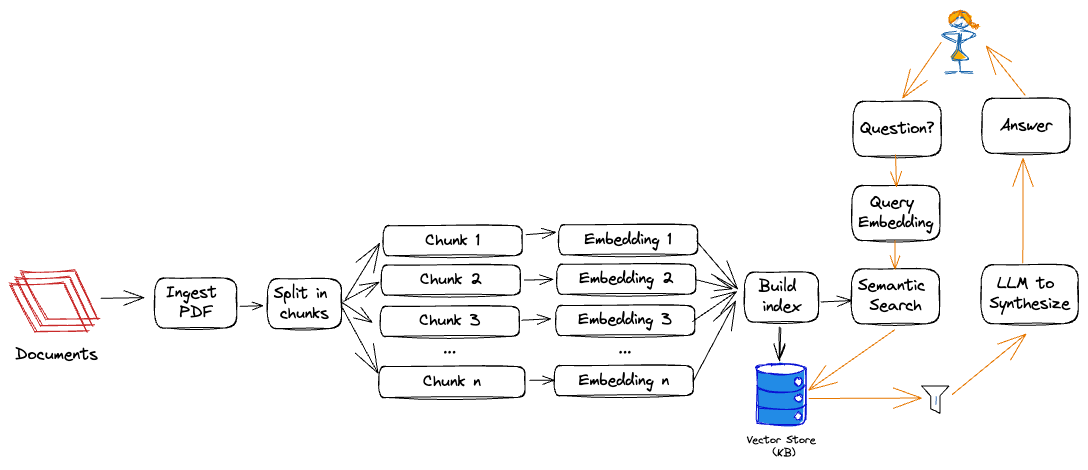

In [ ]:
# Ingest PDF files
from langchain.document_loaders import PyPDFLoader

# Load GOOG's 10K annual report (92 pages).
url = "https://abc.xyz/investor/static/pdf/20230203_alphabet_10K.pdf"
loader = PyPDFLoader(url)
documents = loader.load()

In [ ]:
# split the documents into chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=0)
docs = text_splitter.split_documents(documents)
print(f"# of documents = {len(docs)}")

In [ ]:
# select embedding engine - we use Vertex PaLM Embeddings API
embeddings

In [ ]:
# Store docs in local vectorstore as index
# it may take a while since API is rate limited
from langchain.vectorstores import Chroma

db = Chroma.from_documents(docs, embeddings)

In [ ]:
# Expose index to the retriever
retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": 2})

In [ ]:
# Create chain to answer questions
from langchain.chains import RetrievalQA

# Uses LLM to synthesize results from the search index.
# We use Vertex PaLM Text API for LLM
qa = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=retriever, return_source_documents=True
)

In [ ]:
query = "What was Alphabet's net income in 2022?"
result = qa({"query": query})
print(result)

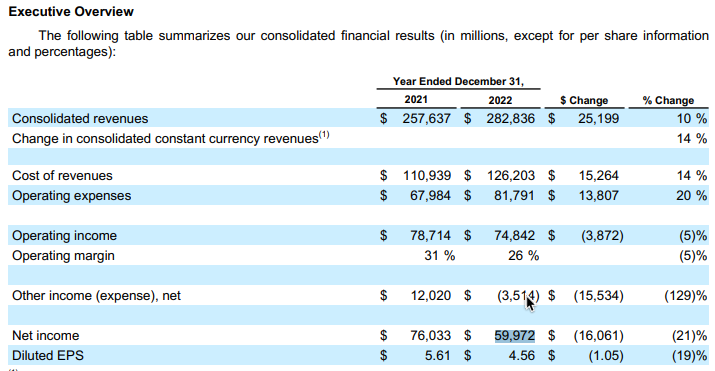

In [ ]:
query = "How much office space reduction took place in 2023?"
result = qa({"query": query})
print(result)

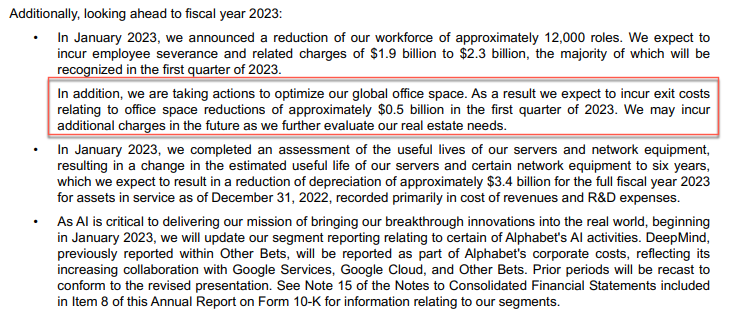